# DSC 540 Final Project 

# PULKIT UPADHYAY

I am using the Seoul Bike Sharing demand prediction data. My goal though is to find the best model or technique to predict the temperature of seoul using the variables present in the dataset. 

Link for the data set:
https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction

# Libraries used

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.decomposition import PCA

# Gathering Data, Data cleaning, and Data Preparation

In [23]:
encodings = ["utf-8-sig", "latin1", "ISO-8859-1", "cp1252"]

for encoding in encodings:
    try:
        df = pd.read_csv("SeoulBikeData.csv", encoding=encoding)

        break
    except UnicodeDecodeError:
        continue

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [25]:
df.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [26]:
df.shape

(8760, 14)

In [27]:
df['Date'] = pd.to_datetime(df['Date']) 

In [28]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [29]:
df.drop(columns = ['Date','Rented Bike Count', 'Holiday', 'Functioning Day'],inplace=True)
df

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Day,Month,Year
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,12,1,2017
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,12,1,2017
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,12,1,2017
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,12,1,2017
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,30,11,2018
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,30,11,2018
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,30,11,2018
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,30,11,2018


In [31]:
df.isnull().sum()

Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Day                          0
Month                        0
Year                         0
dtype: int64

In [33]:
duplicates = df[df.duplicated()]
len(duplicates)

0

In [34]:
df_dummies = pd.get_dummies(df)

In [35]:
df_dummies

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,1,2017,0,0,0,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,1,2017,0,0,0,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,1,2017,0,0,0,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,1,2017,0,0,0,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,1,2017,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,30,11,2018,1,0,0,0
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,30,11,2018,1,0,0,0
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,30,11,2018,1,0,0,0
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,30,11,2018,1,0,0,0


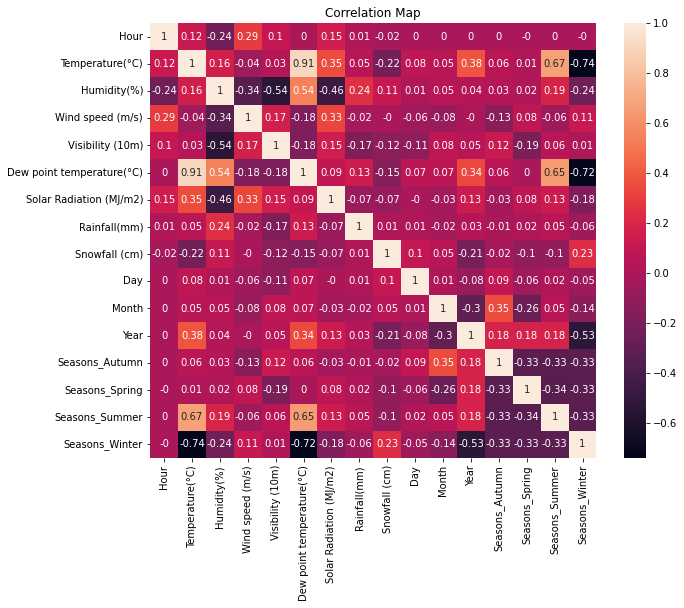

In [56]:
corr_map = df_dummies.corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_map, annot=True)
plt.title('Correlation Map')
plt.show()

In [57]:
y = df_dummies['Temperature(°C)']
X = df_dummies.drop(['Temperature(°C)'], axis=1)

In [58]:
y.shape

(8760,)

In [59]:
X.shape

(8760, 15)

In [89]:
scores = pd.DataFrame(columns=['Model', 'Score', 'RMSE'])

def model_score(model_name, score, rmse):
    global scores
    scores = scores.append({'Model': model_name, 'Score': score, 'RMSE': rmse}, ignore_index=True)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [91]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

# Linear Regression 

In [94]:
lin_mod = LinearRegression()

lin_mod.fit(X_train, y_train)

y_train_pred = lin_mod.predict(X_train)
y_test_pred = lin_mod.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [95]:
print("R^2 on training data:", r2_train)
print("R^2 on test data:", r2_test)
print("RMSE on training data:", rmse_train)
print("RMSE on test data:", rmse_test)

R^2 on training data: 0.9896645641615246
R^2 on test data: 0.9853501178585291
RMSE on training data: 1.2231529421684526
RMSE on test data: 1.4023938892271555


In [96]:
model_score('Linear Regression', r2_test, rmse_test)

# Random Forest

In [97]:
estimator = RandomForestRegressor(n_estimators = 100, random_state = 1)

In [98]:
estimator.fit(X_train, y_train)

y_train_pred = estimator.predict(X_train)
y_test_pred = estimator.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [99]:
print("R^2 on training data:", r2_train)
print("R^2 on test data:", r2_test)
print("RMSE on training data:", rmse_train)
print("RMSE on test data:", rmse_test)

R^2 on training data: 0.9997720499325047
R^2 on test data: 0.9972377478091763
RMSE on training data: 0.1816503459218174
RMSE on test data: 0.6089541698158188


In [101]:
r2_diff = abs(r2_train - r2_test)
print("Difference between training and validation R-squared: {:.3f}".format(r2_diff))

Difference between training and validation R-squared: 0.003


In [102]:
model_score('RF Regression', r2_test, rmse_test)

# Linear SVM

In [113]:
estimator = SVR(kernel='linear')

In [114]:
estimator.fit(X_train, y_train)

y_train_pred_linear = estimator.predict(X_train)
y_test_pred_linear = estimator.predict(X_test)

r2_train_linear = r2_score(y_train, y_train_pred_linear)
r2_test_linear = r2_score(y_test, y_test_pred_linear)

rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))

In [115]:
print("Linear SVM Regressor - R^2 on training data:", r2_train_linear)
print("Linear SVM Regressor - R^2 on test data:", r2_test_linear)
print("Linear SVM Regressor - RMSE on training data:", rmse_train_linear)
print("Linear SVM Regressor - RMSE on test data:", rmse_test_linear)

Linear SVM Regressor - R^2 on training data: 0.9886069634904308
Linear SVM Regressor - R^2 on test data: 0.9835779495570377
Linear SVM Regressor - RMSE on training data: 1.2842101887366557
Linear SVM Regressor - RMSE on test data: 1.4847954779497847


In [111]:
model_score('Linear SVM Regressor', r2_test_linear, rmse_test_linear)

### Polynomial Kernel SVM Regressor

In [116]:
estimator = SVR(kernel='poly')

In [117]:
estimator.fit(X_train, y_train)

y_train_pred_poly = estimator.predict(X_train)
y_test_pred_poly = estimator.predict(X_test)

r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
rmse_test_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))

In [118]:
print("Polynomial SVM Regressor - R^2 on training data:", r2_train_poly)
print("Polynomial SVM Regressor - R^2 on test data:", r2_test_poly)
print("Polynomial SVM Regressor - RMSE on training data:", rmse_train_poly)
print("Polynomial SVM Regressor - RMSE on test data:", rmse_test_poly)

Polynomial SVM Regressor - R^2 on training data: 0.9882393962059581
Polynomial SVM Regressor - R^2 on test data: 0.9847877694882932
Polynomial SVM Regressor - RMSE on training data: 1.3047616288681125
Polynomial SVM Regressor - RMSE on test data: 1.4290564818777967


In [119]:
model_score('Polynomial SVM Regressor', r2_test_poly, rmse_test_poly)

### RBF Kernel SVM Regressor

In [121]:
estimator = SVR(kernel='rbf')

In [122]:
estimator.fit(X_train, y_train)

y_train_pred_rbf = estimator.predict(X_train)
y_test_pred_rbf = estimator.predict(X_test)

r2_train_rbf = r2_score(y_train, y_train_pred_rbf)
r2_test_rbf = r2_score(y_test, y_test_pred_rbf)

rmse_train_rbf = np.sqrt(mean_squared_error(y_train, y_train_pred_rbf))
rmse_test_rbf = np.sqrt(mean_squared_error(y_test, y_test_pred_rbf))

In [123]:
print("RBF SVM Regressor - R^2 on training data:", r2_train_rbf)
print("RBF SVM Regressor - R^2 on test data:", r2_test_rbf)
print("RBF SVM Regressor - RMSE on training data:", rmse_train_rbf)
print("RBF SVM Regressor - RMSE on test data:", rmse_test_rbf)

RBF SVM Regressor - R^2 on training data: 0.9929518097863758
RBF SVM Regressor - R^2 on test data: 0.9898580576497659
RBF SVM Regressor - RMSE on training data: 1.010078610920019
RBF SVM Regressor - RMSE on test data: 1.1668459256201147


In [124]:
model_score('RBF SVM Regressor', r2_test_rbf, rmse_test_rbf)

In [125]:
print(scores)

                      Model     Score      RMSE
0         Linear Regression  0.985350  1.402394
1             RF Regression  0.997238  0.608954
2      Linear SVM Regressor  0.983578  1.484795
3  Polynomial SVM Regressor  0.984788  1.429056
4         RBF SVM Regressor  0.989858  1.166846


# PCA

In [127]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

[0.1886336  0.33429085 0.45226178 0.54872829 0.62719156 0.69562482
 0.75875403 0.81502278 0.87039916 0.91505912 0.95554188 0.98114604
 0.99436739 1.         1.        ]


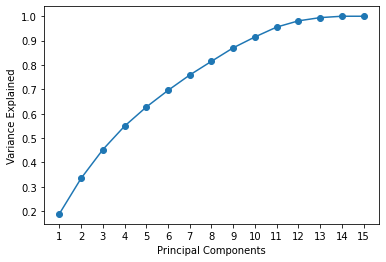

In [128]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [129]:
X_train_pca2 = X_train_pca[:, 0:11]
X_test_pca2 = X_test_pca[:, 0:11]

# Linear Regression After PCA

In [130]:
estimator = LinearRegression()
estimator.fit(X_train_pca2, y_train)

y_train_pred_linear = estimator.predict(X_train_pca2)
y_test_pred_linear = estimator.predict(X_test_pca2)

r2_train_linear = r2_score(y_train, y_train_pred_linear)
r2_test_linear = r2_score(y_test, y_test_pred_linear)

rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))

In [131]:
print("PCA Linear regression - R^2 on training data:", r2_train_linear)
print("PCA Linear regression - R^2 on test data:", r2_test_linear)
print("PCA Linear regression - RMSE on training data:", rmse_train_linear)
print("PCA Linear regression - RMSE on test data:", rmse_test_linear)

PCA Linear regression - R^2 on training data: 0.8756844401462612
PCA Linear regression - R^2 on test data: 0.8760569217280489
PCA Linear regression - RMSE on training data: 4.242082512982414
PCA Linear regression - RMSE on test data: 4.079097483883054


In [132]:
model_score('Linear Regression (PCA)', r2_test_linear, rmse_test_linear)

In [133]:
print(scores)

                      Model     Score      RMSE
0         Linear Regression  0.985350  1.402394
1             RF Regression  0.997238  0.608954
2      Linear SVM Regressor  0.983578  1.484795
3  Polynomial SVM Regressor  0.984788  1.429056
4         RBF SVM Regressor  0.989858  1.166846
5   Linear Regression (PCA)  0.876057  4.079097


# **RF Regression with PCA transformed data**

In [134]:
estimator = RandomForestRegressor(n_estimators=100)

estimator.fit(X_train_pca, y_train)

y_train_pred_rf = estimator.predict(X_train_pca)
y_test_pred_rf = estimator.predict(X_test_pca)

r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

In [135]:
print("PCA RF regression - R^2 on training data:", r2_train_rf)
print("PCA RF regression - R^2 on test data:", r2_test_rf)
print("PCA RF regression - RMSE on training data:", rmse_train_rf)
print("PCA RF regression - RMSE on test data:", rmse_test_rf)

PCA RF regression - R^2 on training data: 0.998409363818766
PCA RF regression - R^2 on test data: 0.9868110918408972
PCA RF regression - RMSE on training data: 0.4798459074448298
PCA RF regression - RMSE on test data: 1.3306301735177204


In [136]:
model_score('RF Regression (PCA)', r2_test_rf, rmse_test_rf)

In [137]:
print(scores)

                      Model     Score      RMSE
0         Linear Regression  0.985350  1.402394
1             RF Regression  0.997238  0.608954
2      Linear SVM Regressor  0.983578  1.484795
3  Polynomial SVM Regressor  0.984788  1.429056
4         RBF SVM Regressor  0.989858  1.166846
5   Linear Regression (PCA)  0.876057  4.079097
6       RF Regression (PCA)  0.986811  1.330630


# **SVM Regression with PCA transformed data**

In [138]:
estimator = SVR(kernel='rbf')

estimator.fit(X_train_pca, y_train)

y_train_pred_svr = estimator.predict(X_train_pca)
y_test_pred_svr = estimator.predict(X_test_pca)

r2_train_svr = r2_score(y_train, y_train_pred_svr)
r2_test_svr = r2_score(y_test, y_test_pred_svr)

rmse_train_svr = np.sqrt(mean_squared_error(y_train, y_train_pred_svr))
rmse_test_svr = np.sqrt(mean_squared_error(y_test, y_test_pred_svr))

In [139]:
print("PCA SVM RBF regression - R^2 on training data:", r2_train_svr)
print("PCA SVM RBF regression - R^2 on test data:", r2_test_svr)
print("PCA SVM RBF regression - RMSE on training data:", rmse_train_svr)
print("PCA SVM RBF regression - RMSE on test data:", rmse_test_svr)

PCA SVM RBF regression - R^2 on training data: 0.9929518097863758
PCA SVM RBF regression - R^2 on test data: 0.9898580576497659
PCA SVM RBF regression - RMSE on training data: 1.0100786109200197
PCA SVM RBF regression - RMSE on test data: 1.166845925620115


In [140]:
model_score('SVM RBF Regression (PCA)', r2_test_svr, rmse_test_svr)

In [141]:
print(scores)

                      Model     Score      RMSE
0         Linear Regression  0.985350  1.402394
1             RF Regression  0.997238  0.608954
2      Linear SVM Regressor  0.983578  1.484795
3  Polynomial SVM Regressor  0.984788  1.429056
4         RBF SVM Regressor  0.989858  1.166846
5   Linear Regression (PCA)  0.876057  4.079097
6       RF Regression (PCA)  0.986811  1.330630
7  SVM RBF Regression (PCA)  0.989858  1.166846


**From the scores and RMSE values, it seems that the Random Forest Regression and RBF SVM Regression models (both with and without PCA) perform relatively well, achieving high scores and low RMSE values.**


**The Linear Regression model without PCA also achieves a high score but has a higher RMSE compared to the other models. This might suggest that the linear relationship assumed by the Linear Regression model might not capture all the complexities in the data, leading to higher prediction errors.**